<a href="https://colab.research.google.com/github/molitorl/Projekt-LJL/blob/main/Maternal_Health_Risk_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projekt: Maternal Health Risk Classification Model**

**Team:**

Linda Fahrenbruch

Lucia Molitor

Anja Prpic





**Variablen:**


**Age (Integer):** Alter in Jahren einer Frau während der Schwangerschaft.

**SystolicBP (Integer)**: Oberer Wert des Blutdrucks in mmHg.

**DiastolicBP (Integer)**: Unterer Wert des Blutdrucks in mmHg.

**BS (Integer)**: Blutzuckerspiegel

**BodyTemp (Integer)**: Körpertemperatur in Fahrenheit.

**HeartRate (Integer)**: Ruhepuls


**RiskLevel (Categorical)**: Prognostizierte Risiko-Intensitätsstufe während der Schwangerschaft.

## Import der Libraries

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Pfade zu den Excel-Dateien
raw_data_path = "/content/drive/My Drive/AI and ML/Data/dataset_maternal_health.xlsx"
raw_data = pd.read_excel(raw_data_path)

Mounted at /content/drive


In [5]:
raw_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


## Data Cleansing

In [6]:
# Überblick über die Daten
print(raw_data.info())
print(raw_data.describe())
print(raw_data['RiskLevel'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50% 

In [7]:
(raw_data.isna().sum()/len(raw_data)).apply('{0:.4%}'.format)

Age            0.0000%
SystolicBP     0.0000%
DiastolicBP    0.0000%
BS             0.0000%
BodyTemp       0.0000%
HeartRate      0.0000%
RiskLevel      0.0000%
dtype: object

In [8]:
raw_data.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [9]:
# Datentypen überprüfen
print(raw_data.dtypes)

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object


In [10]:
# Kategorische Variablen in numerische Werte konvertieren
raw_data['RiskLevel'] = raw_data['RiskLevel'].map({'low risk': 0, 'mid risk': 1, 'high risk': 2})

In [11]:
print(raw_data)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86          2
1      35         140           90  13.0      98.0         70          2
2      29          90           70   8.0     100.0         80          2
3      30         140           85   7.0      98.0         70          2
4      35         120           60   6.1      98.0         76          0
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80          2
1010   55         120           90  18.0      98.0         60          2
1011   35          85           60  19.0      98.0         86          2
1012   43         120           90  18.0      98.0         70          2
1013   32         120           65   6.0     101.0         76          1

[1014 rows x 7 columns]


In [12]:
variance_values = raw_data.var()

In [13]:
print(variance_values)

Age            181.559065
SystolicBP     338.704005
DiastolicBP    192.815323
BS              10.847351
BodyTemp         1.880695
HeartRate       65.427104
RiskLevel        0.651818
dtype: float64


In [14]:
# BodyTemp von Fahrenheit zu Celsius umrechnen, damit wir die Daten verstehen :)
raw_data['BodyTemp'] = (raw_data['BodyTemp'] - 32) * 5.0/9.0


In [15]:
print(variance_values)

Age            181.559065
SystolicBP     338.704005
DiastolicBP    192.815323
BS              10.847351
BodyTemp         1.880695
HeartRate       65.427104
RiskLevel        0.651818
dtype: float64


## Skalierung

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = raw_data.copy()
data_scaled[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']] = scaler.fit_transform(raw_data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']])


In [26]:
# Daten nach dem Preprocessing anzeigen
print(data_scaled.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0 -0.361738    0.913396     0.255023  1.905890 -0.485215   1.446956          2
1  0.380777    1.457027     0.975539  1.298340 -0.485215  -0.532088          2
2 -0.064732   -1.261127    -0.465493 -0.220537  0.973884   0.704815          2
3  0.009519    1.457027     0.615281 -0.524312 -0.485215  -0.532088          2
4  0.380777    0.369765    -1.186009 -0.797710 -0.485215   0.210054          0


In [27]:
raw_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,36.666667,86,2
1,35,140,90,13.0,36.666667,70,2
2,29,90,70,8.0,37.777778,80,2
3,30,140,85,7.0,36.666667,70,2
4,35,120,60,6.1,36.666667,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,36.666667,80,2
1010,55,120,90,18.0,36.666667,60,2
1011,35,85,60,19.0,36.666667,86,2
1012,43,120,90,18.0,36.666667,70,2


# Analyse

## Decision Trees

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'RiskLevel' column
label_encoder = LabelEncoder()
raw_data['RiskLevel'] = label_encoder.fit_transform(raw_data['RiskLevel'])

# Split the data into features and target variable
X = raw_data.drop('RiskLevel', axis=1)
y = raw_data['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
#In the next Code block I determined the optimal max depth to be 17.

clf = DecisionTreeClassifier(max_depth=17)

# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17)

Optimal max depth: 17


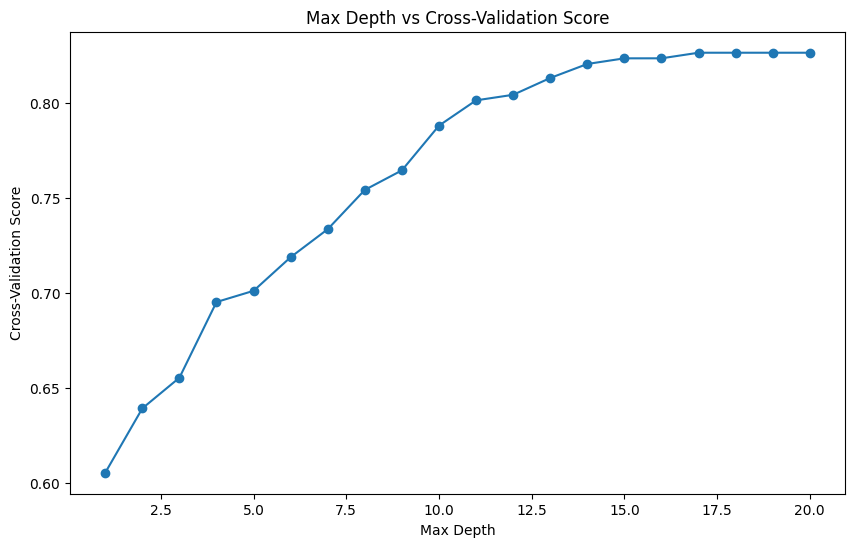

In [30]:
#Pruning: Determine max depth of the decision tree
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the range of max depths to evaluate
max_depths = range(1, 21)

# Initialize an empty list to store the average cross-validation scores
cv_scores = []

# Perform cross-validation for each max depth
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    cv_scores.append(np.mean(scores))

# Determine the optimal max depth based on cross-validation scores
optimal_max_depth = max_depths[np.argmax(cv_scores)]

print(f"Optimal max depth: {optimal_max_depth}")

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(max_depths, cv_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validation Score')
plt.title('Max Depth vs Cross-Validation Score')
plt.show()


In [31]:
#Look at parameters that are being used by the model
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [34]:
clf.predict_proba(X_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print a class report to have the precision, recall and f1 score in one place
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
feature_names = X.columns
feature_names

In the next step we want to plot and visualize the decision trees. This will help understand the data better and analyse the models performance.

In [36]:
!pip install seaborn matplotlib graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz


#### Pair Plot
A pair plot allows us to visualize the relationships between all pairs of features and how they relate to the target variable RiskLevel. This helps in understanding the distribution and interactions of the features.

 This plot will display scatter plots for each pair of features and the distribution of each feature colored by the RiskLevel. This helps in identifying any patterns or correlations between features and the target variable.

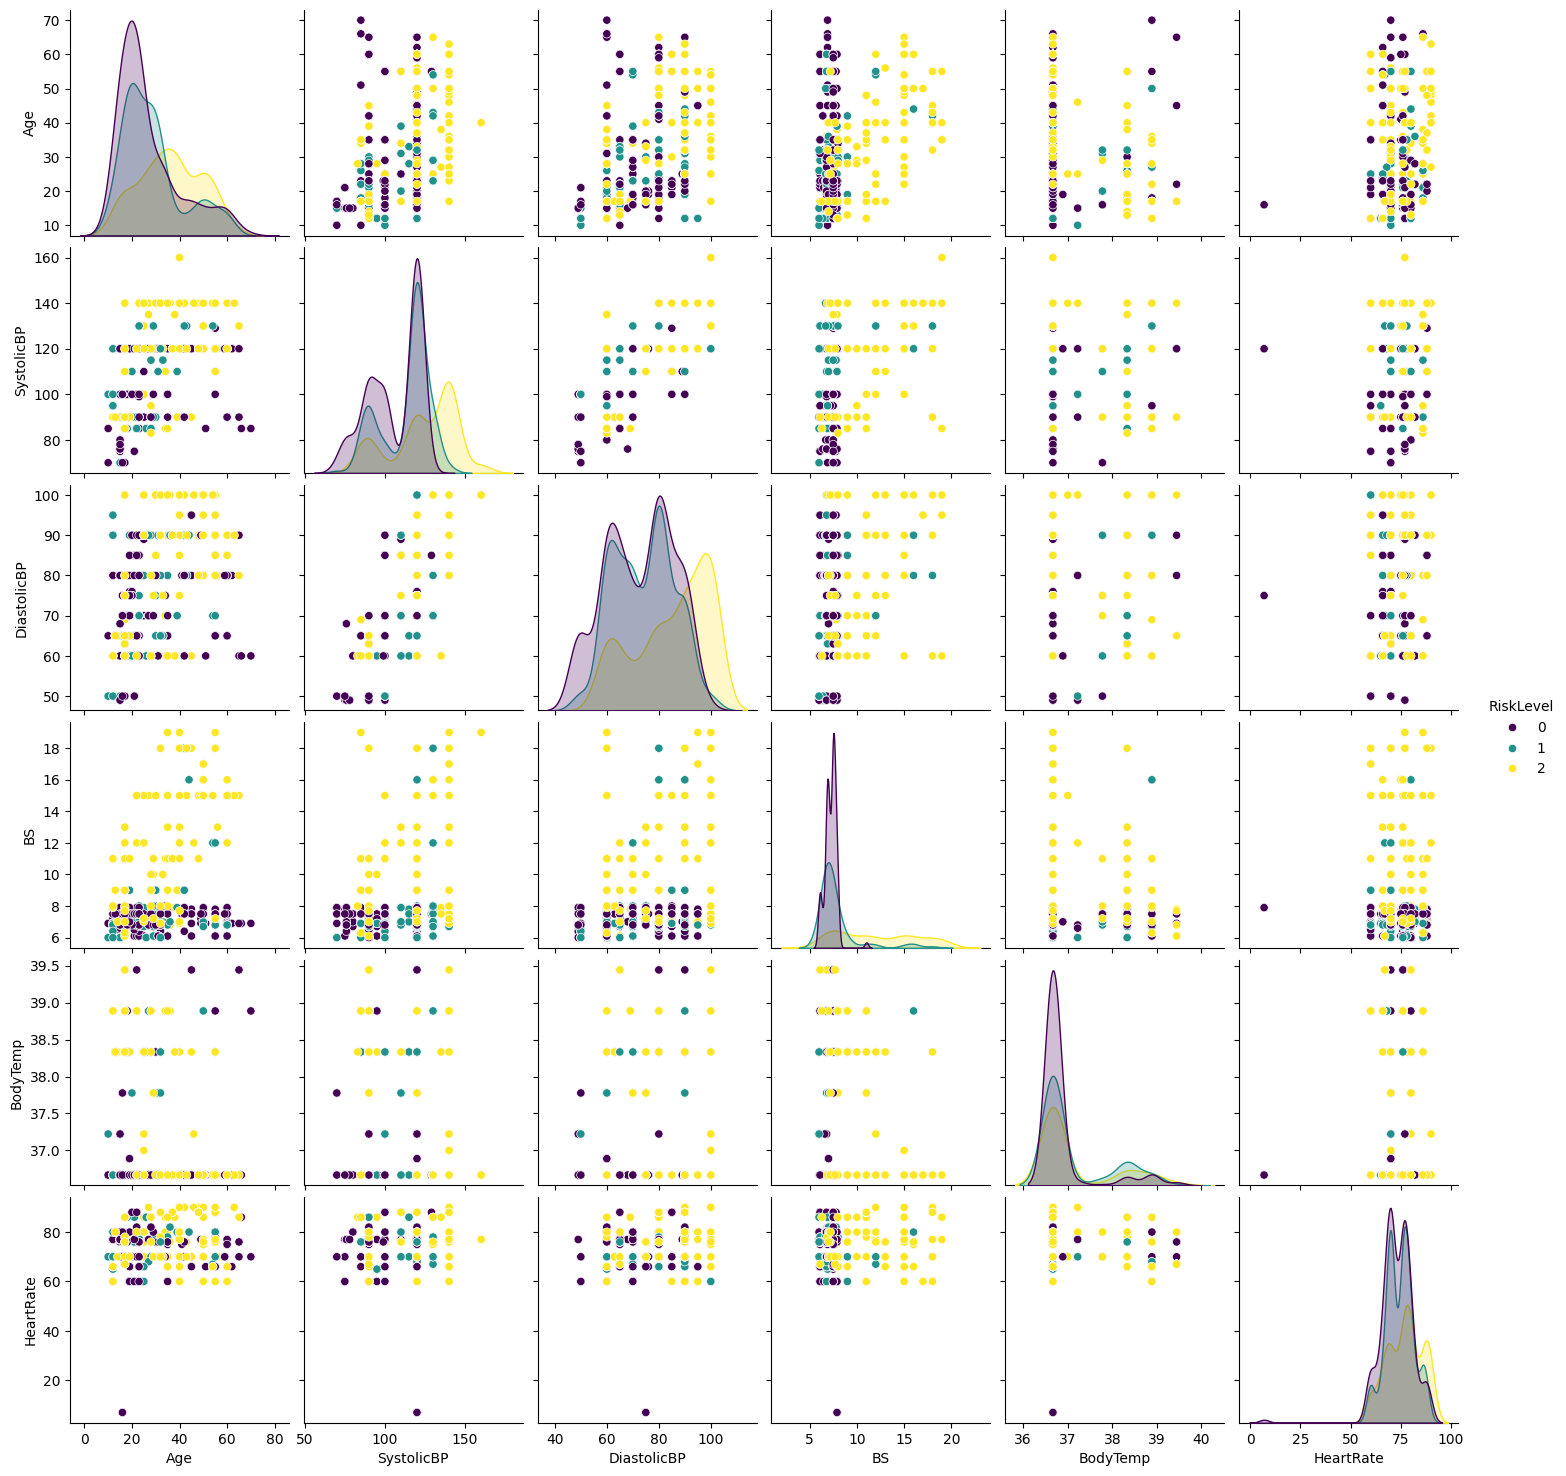

In [37]:
# Pair plot
sns.pairplot(raw_data, hue='RiskLevel', palette='viridis')
plt.show()


#### Correlation Heatmap
A correlation heatmap shows the correlation coefficients between different features. This indicates how changes in one feature are associated with changes in another feature. Strong correlations can indicate multicollinearity which might need to be addressed.

The heatmap will provide insights into which features are correlated and the strength of those correlations. This helps in understanding the underlying structure of the data.



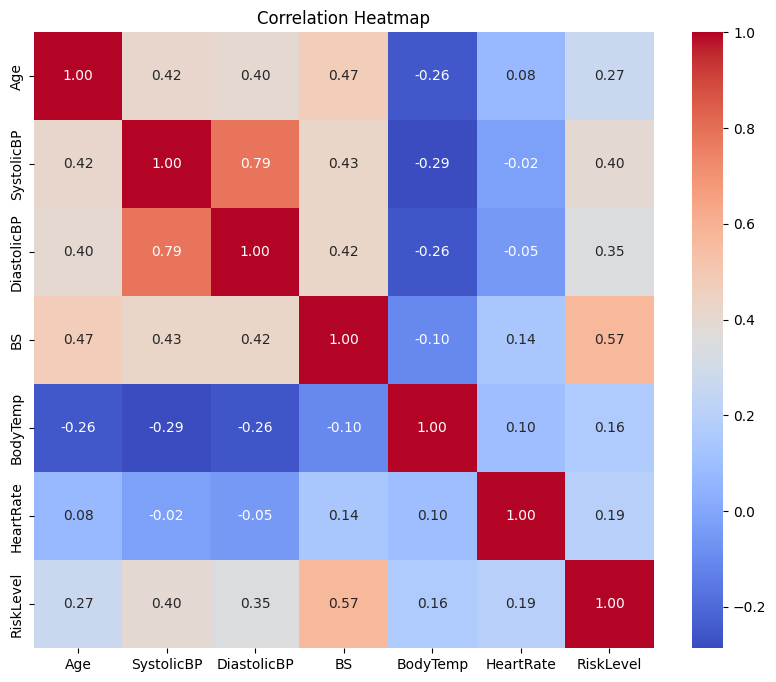

In [38]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(raw_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### Feature importance
Feature importance visualization shows how important each feature is for the decision tree in making predictions. This helps in understanding which features contribute the most to the model’s decisions.

The bar plot of feature importance helps identify which features have the most influence on the model's predictions. This can be useful for feature selection and understanding the model.

In [39]:
# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='plasma')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

####Confusion Matrix
A confusion matrix shows the actual vs. predicted classifications, which is useful for understanding the performance of the classification model. It highlights where the model is making correct predictions and where it is making errors.

The heatmap of the confusion matrix provides a visual summary of the classification results, showing the number of correct and incorrect predictions for each class.

In [ ]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Decision Tree Visualization
Visualizing the decision tree itself provides insights into how the model makes decisions based on feature splits. This can help in understanding the model's logic and identifying any potential overfitting.

This generates a visual representation of the decision tree, illustrating the splits based on feature values and the corresponding decisions made at each node. This helps in interpreting the model and explaining its behavior.

In [ ]:
# Ensure class names are strings
class_names = list(map(str, label_encoder.classes_))

# Decision tree visualization
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph


## Random Forest

### Model Training and Evaluation

In [41]:
#scaled_data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target variable
X = data_scaled.drop(columns=['RiskLevel'])
y = data_scaled['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.81

Confusion Matrix:
[[61 16  3]
 [ 9 64  3]
 [ 1  6 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.74      0.84      0.79        76
           2       0.87      0.85      0.86        47

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



#### Interpretation

**Accuracy**: 0.81

The overall accuracy of the Random Forest model is 0.81, meaning that 81% of the predictions made by the model are correct.

**Confusion Matrix:**

The confusion matrix provides a detailed breakdown of the model's predictions:

   Class 0 (Low Risk):
        Correctly predicted: 61
        Incorrectly predicted as Class 1: 16
        Incorrectly predicted as Class 2: 3

  Class 1 (Mid Risk):
        Correctly predicted: 64
        Incorrectly predicted as Class 0: 9
        Incorrectly predicted as Class 2: 3

  Class 2 (High Risk):
        Correctly predicted: 40
        Incorrectly predicted as Class 0: 1
        Incorrectly predicted as Class 1: 6

**Classification Report:**

Class 0 (Low Risk):

  Precision: 0.86 (Of all instances predicted as low risk, 86% are actually low risk.)
  
  Recall: 0.76 (Of all actual low risk instances, 76% are correctly identified.)
  
  F1-Score: 0.81 (Harmonic mean of precision and recall.)

Class 1 (Mid Risk):

   Precision: 0.74 (Of all instances predicted as mid risk, 74% are actually mid risk.)
   
   Recall: 0.84 (Of all actual mid risk instances, 84% are correctly identified.)
   
   F1-Score: 0.79 (Harmonic mean of precision and recall.)

Class 2 (High Risk):

   Precision: 0.87 (Of all instances predicted as high risk, 87% are actually high risk.)
   
   Recall: 0.85 (Of all actual high risk instances, 85% are correctly identified.)
   
   F1-Score: 0.86 (Harmonic mean of precision and recall.)

**Summary:**

The Random Forest model shows strong performance, particularly for high-risk cases (Class 2) with high precision (0.87) and recall (0.85). The model is slightly less effective for low-risk cases (Class 0), with a recall of 0.76, indicating some low-risk cases are misclassified. Mid-risk cases (Class 1) have good recall (0.84) but lower precision (0.74), meaning there are more false positives. Overall, the model provides a balanced and accurate classification across all risk levels, with an overall accuracy of 0.81.

In [50]:
#raw_data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target variable
X = raw_data.drop(columns=['RiskLevel'])
y = raw_data['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = rf_model.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix1 = confusion_matrix(y_test, y_pred)
class_report1 = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy1:.2f}')
print("\nConfusion Matrix:")
print(conf_matrix1)
print("\nClassification Report:")
print(class_report1)

Accuracy: 0.81

Confusion Matrix:
[[61 16  3]
 [ 9 64  3]
 [ 1  6 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.74      0.84      0.79        76
           2       0.87      0.85      0.86        47

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



### Feature Importance




<ipython-input-42-3f775d4c99e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='plasma')


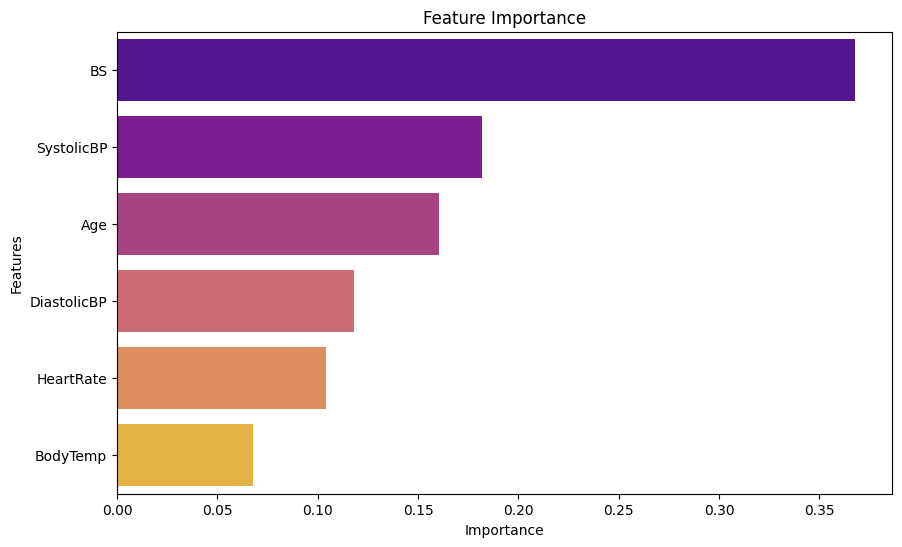

In [42]:
# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='plasma')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The feature importance plot shows that BS (Blood Sugar) and SystolicBP (Systolic Blood Pressure) are the most influential features in predicting maternal health risk.

### Confusion Matrix Visualization

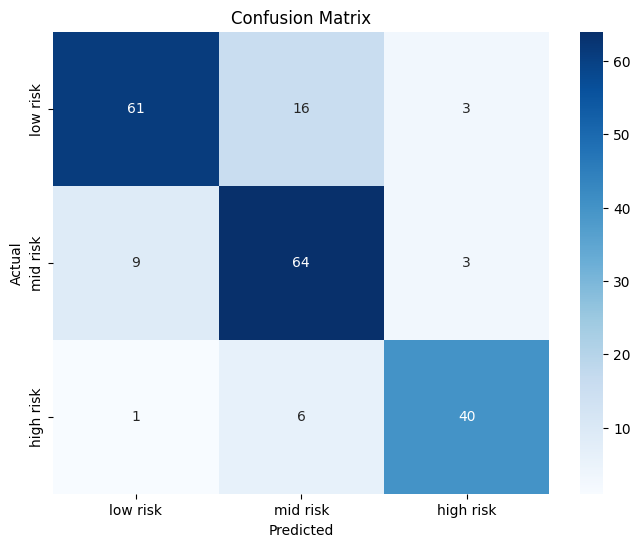

In [43]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low risk', 'mid risk', 'high risk'], yticklabels=['low risk', 'mid risk', 'high risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix heatmap provides a visual summary of the classification results, showing the number of correct and incorrect predictions for each class.

### ROC Curve

In [45]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves
def plot_roc_curves(model, X_test, y_test, title):
    plt.figure(figsize=(10, 8))
    for i in range(3):  # assuming 3 classes
        fpr, tpr, _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

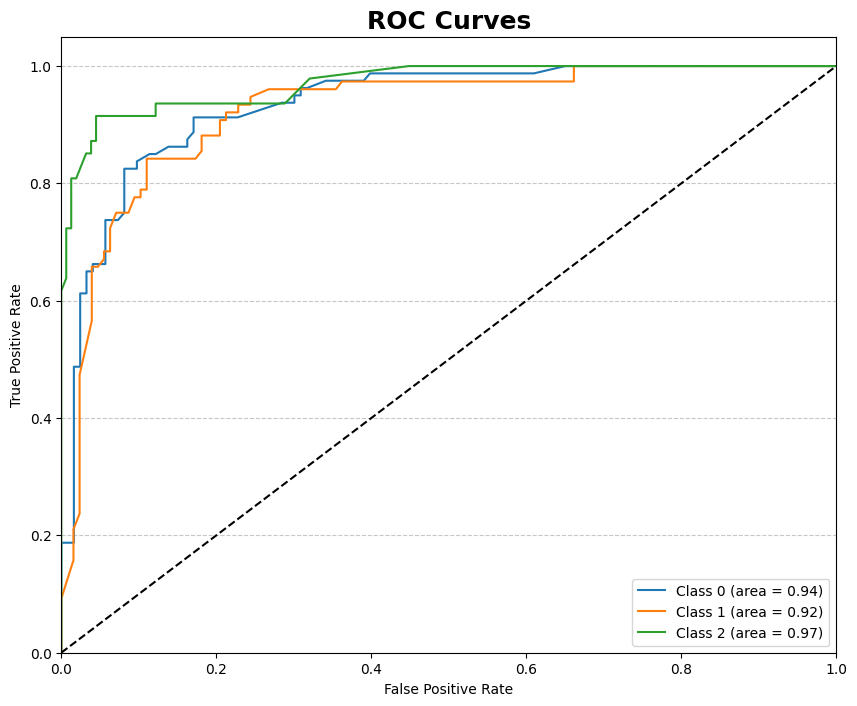

In [47]:
# ROC Curve
plot_roc_curves(rf_model, X_test, y_test, 'ROC Curves')

The ROC curves show the trade-off between sensitivity (recall) and specificity for each class. The area under the curve (AUC) values indicate that the model performs well in distinguishing between the different risk levels.

### Precision-Recall Curve

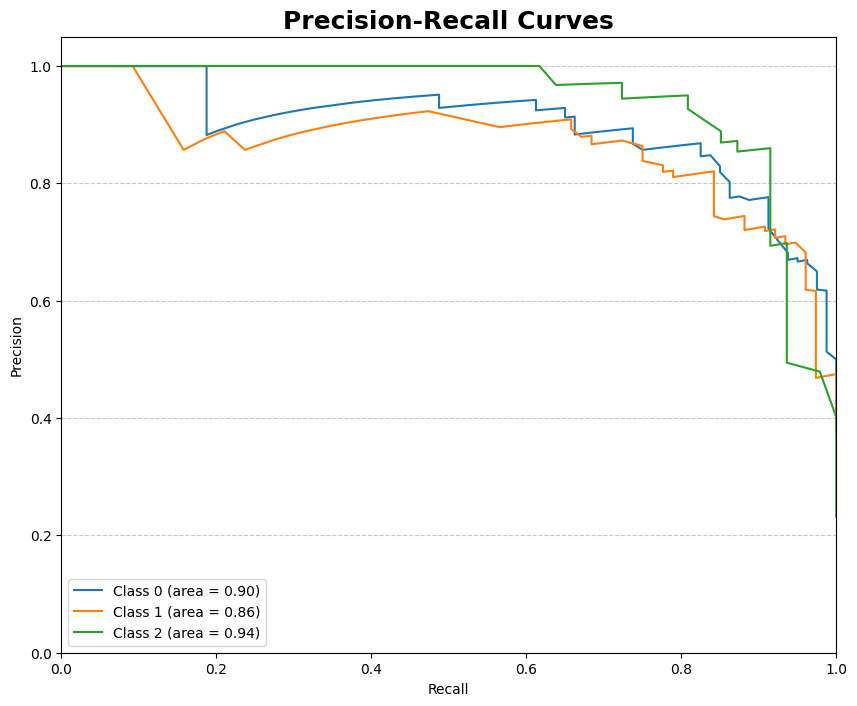

In [46]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot Precision-Recall curves
def plot_precision_recall_curves(model, X_test, y_test, title):
    plt.figure(figsize=(10, 8))
    for i in range(3):  # assuming 3 classes
        precision, recall, _ = precision_recall_curve(y_test == i, model.predict_proba(X_test)[:, i])
        avg_precision = average_precision_score(y_test == i, model.predict_proba(X_test)[:, i])
        plt.plot(recall, precision, label=f'Class {i} (area = {avg_precision:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(loc="lower left")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Precision-Recall Curve
plot_precision_recall_curves(rf_model, X_test, y_test, 'Precision-Recall Curves')

The Precision-Recall curves provide a more detailed analysis of the model's performance for each class, particularly useful when dealing with imbalanced datasets. The curves show that the model maintains a good balance between precision and recall for all classes.

**Summary:**
The Random Forest model shows strong performance, particularly for high-risk cases (Class 2) with high precision (0.87) and recall (0.85). The model is slightly less effective for low-risk cases (Class 0), with a recall of 0.76, indicating some low-risk cases are misclassified. Mid-risk cases (Class 1) have good recall (0.84) but lower precision (0.74), meaning there are more false positives. Overall, the model provides a balanced and accurate classification across all risk levels, with an overall accuracy of 0.81.

## **Gradient Boosting**

After evaluating the performance of decision tree and random forest models for the classification of maternal health risk, we have decided to proceed with more advanced modeling techniques. While the initial models provided a foundational understanding of the data, their performance metrics indicated room for improvement. Advanced models, such as gradient boosting offer the potential to capture complex patterns and interactions within the data more effectively. This step aims to enhance prediction accuracy and robustness, ultimately leading to more reliable and actionable insights for maternal health risk assessment.

### Baseline Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into features and target variable
X = raw_data.drop(columns=['RiskLevel'])
y = raw_data['RiskLevel']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the gradient boosting classifier
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7389162561576355
Confusion Matrix:
 [[59 16  5]
 [19 52  5]
 [ 4  4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        80
           1       0.72      0.68      0.70        76
           2       0.80      0.83      0.81        47

    accuracy                           0.74       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.74      0.74      0.74       203



#### Feature Importance

Model fitted: True


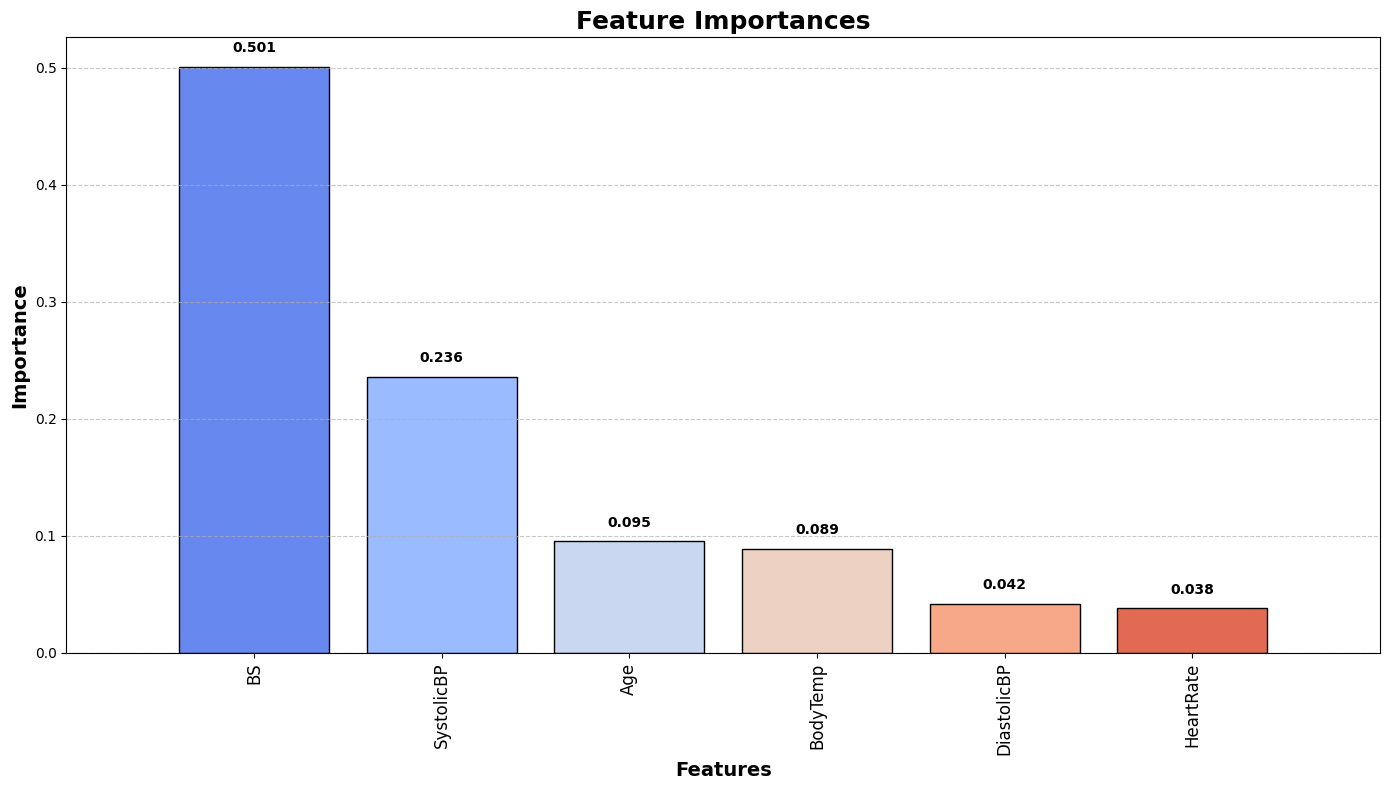

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Verify if the model is fitted
is_fitted = hasattr(gb_model, "feature_importances_")
print(f"Model fitted: {is_fitted}")

if is_fitted:
    # Get feature importances
    feature_importances = gb_model.feature_importances_

    # Get feature names
    feature_names = X.columns

    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]

    # Create a color palette
    palette = sns.color_palette("coolwarm", len(feature_importances))

    # Plot the feature importances
    plt.figure(figsize=(14, 8))
    plt.title("Feature Importances", fontsize=18, fontweight='bold')
    bars = plt.bar(range(X.shape[1]), feature_importances[indices], color=palette, edgecolor='black', align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90, fontsize=12)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Features', fontsize=14, fontweight='bold')
    plt.ylabel('Importance', fontsize=14, fontweight='bold')
    plt.tight_layout()

    # Adding value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The model is not fitted properly.")



Blood Sugar (BS) is the most influential feature, with an importance score of 0.501. This indicates that blood sugar levels play a critical role in determining maternal health risk, potentially overshadowing other factors.
Systolic Blood Pressure (SystolicBP) ranks second in importance, with a score of 0.235. This suggests that systolic blood pressure is also a significant predictor of maternal health risk.
Age and Body Temperature (BodyTemp) follow with importance scores of 0.095 and 0.089, respectively, indicating moderate influence on the prediction outcomes.
Diastolic Blood Pressure (DiastolicBP) and Heart Rate have lower importance scores of 0.041 and 0.038, respectively, suggesting they contribute less to the model compared to the other features.
Overall, the model highlights that blood sugar and systolic blood pressure are the most critical factors in assessing maternal health risk, emphasizing the need to closely monitor these parameters.

#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation
cv_scores = cross_val_score(gb_model, X_scaled, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.81280788 0.62561576 0.71428571 0.75862069 0.7970297 ]
Mean CV Score: 0.7416719504462762


The cross-validation scores indicate how well our model performs across different splits of the dataset. The scores range from about 0.63 to 0.81, with a mean cross-validation score of approximately 0.74. This variability suggests that while our model generally performs well, there are some splits where the performance could be improved, which is why we will implement different improvement strategies in the following sections.

### Hyperparameter Tuning

To determine the best hyperparameters for our Gradient Boosting model, we compared two optimization methods: Grid Search and Bayesian Optimization.


#### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the gradient boosting classifier
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8311065666893886
Accuracy: 0.8275862068965517
Confusion Matrix:
 [[64 11  5]
 [ 9 64  3]
 [ 1  6 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        80
           1       0.79      0.84      0.82        76
           2       0.83      0.85      0.84        47

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



The process of tuning hyperparameters with Grid Search involved fitting 5-fold cross-validation for each of 243 candidate hyperparameter combinations, resulting in a total of 1,215 fits. The Grid Search identified the best hyperparameters as follows: learning_rate of 0.1, max_depth of 5, min_samples_leaf of 1, min_samples_split of 2, and n_estimators of 200. The best cross-validation score achieved was 0.8311. Evaluating the model on the test data, we obtained an accuracy of 82.76%. The confusion matrix showed 64 correct predictions for low risk, 64 for mid risk, and 40 for high risk, with corresponding precision, recall, and F1-scores of 0.86, 0.79, and 0.83 for low risk, 0.79, 0.84, and 0.82 for mid risk, and 0.83, 0.85, and 0.84 for high risk, respectively. Overall, the model achieved a balanced performance across all classes with a macro and weighted average F1-score of 0.83, indicating robust and reliable predictions for maternal health risks.

#### Bayesian Optimization

In [ ]:
# Install scikit-optimize
!pip install scikit-optimize

from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define parameter space for Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.2),
    'max_depth': (3, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Initialize the Bayesian search
bayes_search = BayesSearchCV(estimator=GradientBoostingClassifier(), search_spaces=param_space, n_iter=32, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
bayes_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)

# Use the best estimator to make predictions
best_gb_model = bayes_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 can

Using Bayesian optimization, we fine-tuned the hyperparameters of our Gradient Boosting model to enhance its predictive performance for maternal health risk classification. The optimization process identified the best parameters: learning_rate of 0.114, max_depth of 9, min_samples_leaf of 4, min_samples_split of 3, and n_estimators of 100. The optimized model achieved an accuracy of 83.74%, with balanced precision, recall, and F1-scores across all classes. This indicates that the model performs well in distinguishing between different risk levels, providing reliable and accurate predictions. The results from Bayesian optimization demonstrate that careful hyperparameter tuning can significantly improve model performance.

**Hyperparameter Tuning Summary:** The Grid Search method identified optimal parameters yielding a test accuracy of 82.76%, while Bayesian Optimization achieved a slightly higher accuracy of 83.74%. Bayesian Optimization also provided better precision for the low-risk class (Class 0) and balanced performance across all classes. Based on these results, we selected the Bayesian Optimization approach for its superior accuracy and class-specific performance, enhancing the model's ability to predict maternal health risks accurately and reliably.

### SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is a method used to address class imbalance in a dataset. Class imbalance occurs when some classes have significantly fewer samples than others, which can lead to poor model performance because the model may be biased towards the majority class.

In our case, the maternal health risk dataset has three classes: low risk, mid risk, and high risk. If these classes are not balanced (i.e., if one or more classes have significantly fewer samples than others), the model might not learn to predict the minority classes effectively. Hence, we first test whether or not that is the case:

In [ ]:
# Check the distribution of target classes
print(raw_data['RiskLevel'].value_counts())


RiskLevel
0    406
1    336
2    272
Name: count, dtype: int64


The dataset does show some imbalance, with the high-risk class having fewer samples compared to the low-risk class. However, the imbalance is not extremely severe. It might still be beneficial to apply SMOTE to balance the classes more evenly and potentially improve model performance, especially for the minority class.

### Tuned Model

Applying SMOTE to (Bayesian) tuned model:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the gradient boosting classifier with Bayesian optimized parameters
bayesian_params = {
    'n_estimators': 100,
    'learning_rate': 0.11428292554660366,
    'max_depth': 9,
    'min_samples_split': 3,
    'min_samples_leaf': 4,
    'random_state': 42
}

gb_model = GradientBoostingClassifier(**bayesian_params)

# Train the model without SMOTE
gb_model.fit(X_train, y_train)
y_pred_no_smote = gb_model.predict(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model with SMOTE
gb_model_smote = GradientBoostingClassifier(**bayesian_params)
gb_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = gb_model_smote.predict(X_test)

# Evaluate the model without SMOTE
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
conf_matrix_no_smote = confusion_matrix(y_test, y_pred_no_smote)
class_report_no_smote = classification_report(y_test, y_pred_no_smote)

# Evaluate the model with SMOTE
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

# Print evaluation results side by side
print("Without SMOTE - Accuracy:", accuracy_no_smote)
print("Without SMOTE - Confusion Matrix:\n", conf_matrix_no_smote)
print("Without SMOTE - Classification Report:\n", class_report_no_smote)

print("With SMOTE - Accuracy:", accuracy_smote)
print("With SMOTE - Confusion Matrix:\n", conf_matrix_smote)
print("With SMOTE - Classification Report:\n", class_report_smote)


Without SMOTE - Accuracy: 0.8325123152709359
Without SMOTE - Confusion Matrix:
 [[65 11  4]
 [ 9 64  3]
 [ 1  6 40]]
Without SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        80
           1       0.79      0.84      0.82        76
           2       0.85      0.85      0.85        47

    accuracy                           0.83       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.83      0.83      0.83       203

With SMOTE - Accuracy: 0.8226600985221675
With SMOTE - Confusion Matrix:
 [[63 11  6]
 [ 9 64  3]
 [ 1  6 40]]
With SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        80
           1       0.79      0.84      0.82        76
           2       0.82      0.85      0.83        47

    accuracy                           0.82       203
   macro avg       0.82      0.83      0.8


**Overall Performance**:
- Both models show similar performance metrics, indicating that SMOTE does not significantly degrade the model's performance.
- The slight decrease in accuracy with SMOTE might be due to the model learning from the synthetic samples, which could introduce minor noise.



**Without SMOTE** we see slightly better overall accuracy and F1-score for low-risk class. **With SMOTE** ensures balanced learning across all classes, which can be beneficial in scenarios with significant class imbalance. In our case, the low risk class has about 1.5 times the number of samples as the High Risk class (406 vs. 272). This indicates a moderate imbalance.
This moderate imbalance could still affect our model performance, particularly for the minority class (High Risk). The model might learn the patterns for the majority class better than those for the minority class.

####**Feature Importance**

<ipython-input-33-f7d5d89110bb>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars_no_smote = sns.barplot(x='Importance', y='Feature', data=importances_df_no_smote, palette=palette, ax=ax[0], edgecolor='black')
<ipython-input-33-f7d5d89110bb>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars_smote = sns.barplot(x='Importance', y='Feature', data=importances_df_smote, palette=palette, ax=ax[1], edgecolor='black')


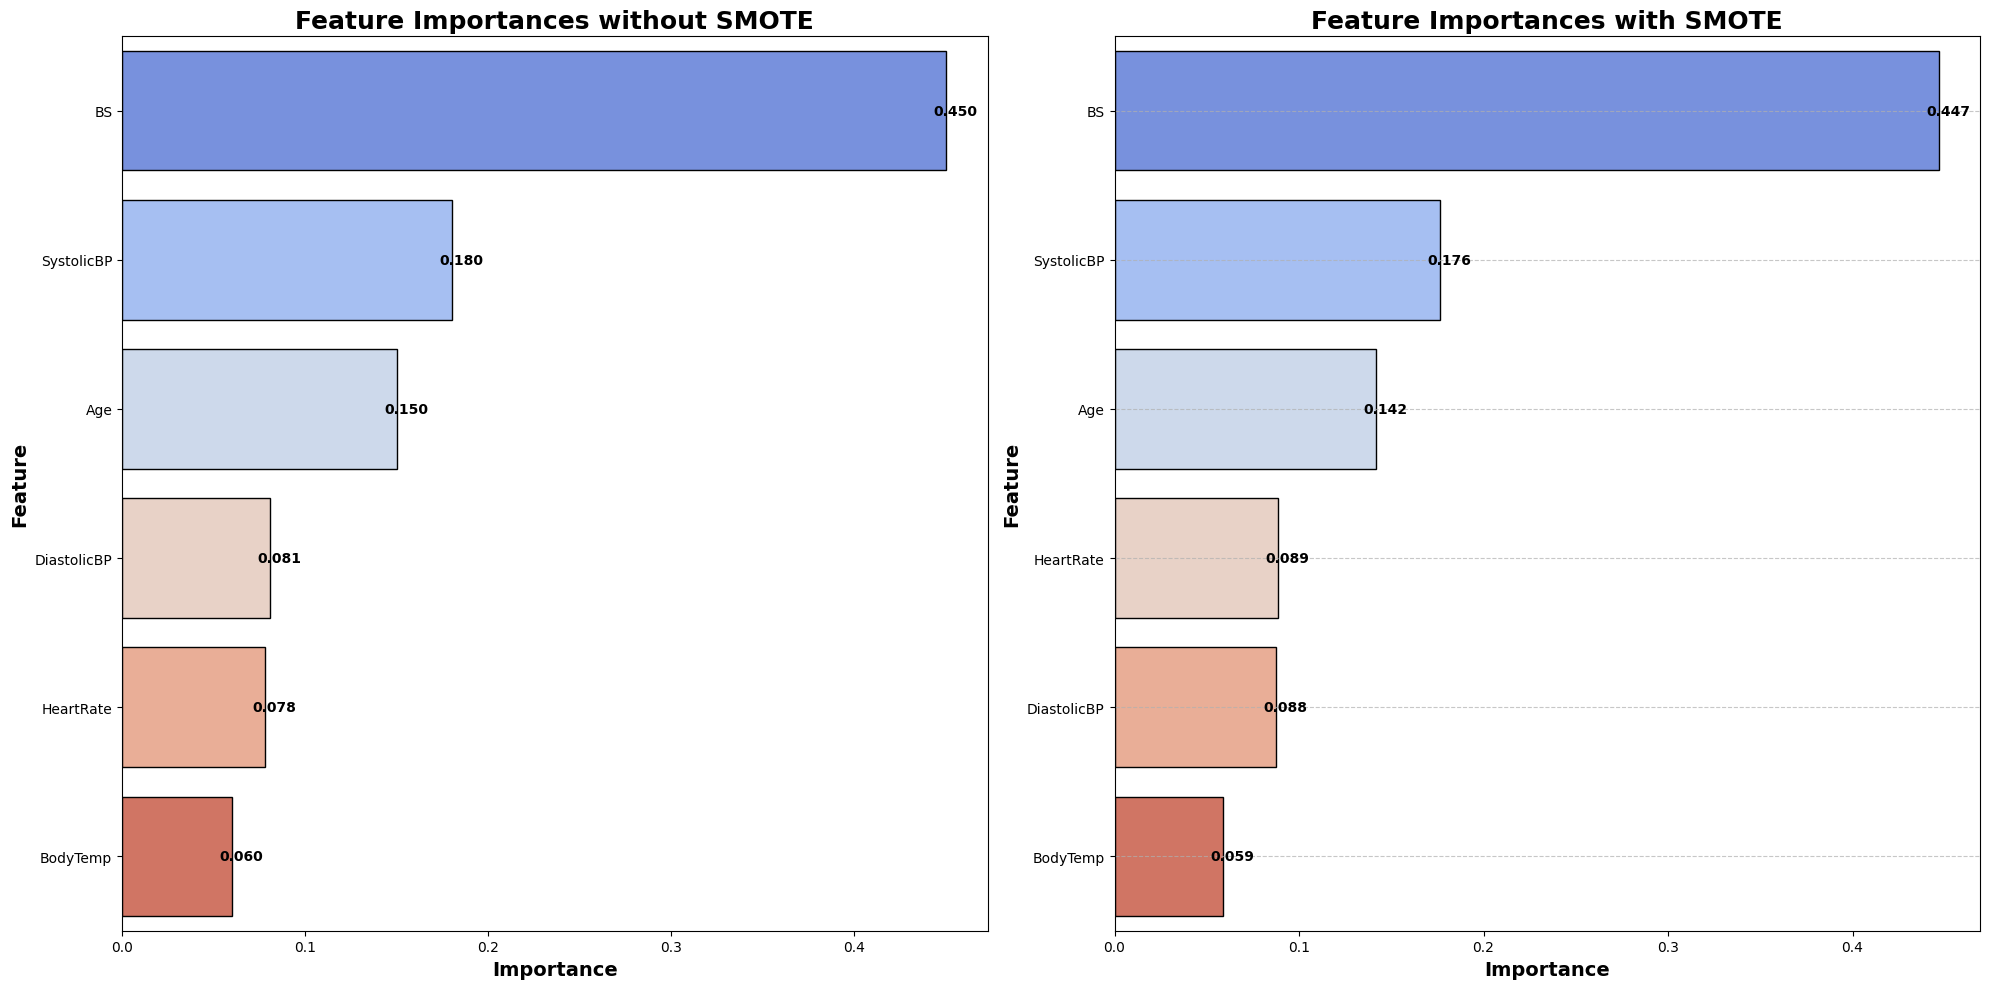

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Feature importances from the model without SMOTE
importances_no_smote = gb_model.feature_importances_
features = X.columns

# Feature importances from the model with SMOTE
importances_smote = gb_model_smote.feature_importances_

# Create DataFrame for visualization
importances_df_no_smote = pd.DataFrame({'Feature': features, 'Importance': importances_no_smote}).sort_values(by='Importance', ascending=False)
importances_df_smote = pd.DataFrame({'Feature': features, 'Importance': importances_smote}).sort_values(by='Importance', ascending=False)

# Plot feature importances
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot for model without SMOTE
palette = sns.color_palette("coolwarm", len(importances_df_no_smote))
bars_no_smote = sns.barplot(x='Importance', y='Feature', data=importances_df_no_smote, palette=palette, ax=ax[0], edgecolor='black')
ax[0].set_title("Feature Importances without SMOTE", fontsize=18, fontweight='bold')
ax[0].set_xlabel("Importance", fontsize=14, fontweight='bold')
ax[0].set_ylabel("Feature", fontsize=14, fontweight='bold')

# Adding value labels on top of the bars for no SMOTE plot
for bar in bars_no_smote.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    ax[0].text(bar_width + 0.005, bar.get_y() + bar.get_height() / 2, f'{bar_width:.3f}', ha='center', va='center', fontsize=10, fontweight='bold')

# Plot for model with SMOTE
palette = sns.color_palette("coolwarm", len(importances_df_smote))
bars_smote = sns.barplot(x='Importance', y='Feature', data=importances_df_smote, palette=palette, ax=ax[1], edgecolor='black')
ax[1].set_title("Feature Importances with SMOTE", fontsize=18, fontweight='bold')
ax[1].set_xlabel("Importance", fontsize=14, fontweight='bold')
ax[1].set_ylabel("Feature", fontsize=14, fontweight='bold')

# Adding value labels on top of the bars for SMOTE plot
for bar in bars_smote.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    ax[1].text(bar_width + 0.005, bar.get_y() + bar.get_height() / 2, f'{bar_width:.3f}', ha='center', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### **ROC**

The ROC (Receiver Operating Characteristic) curve is a graphical representation that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. Here, we have the ROC curves for a multi-class classification problem with three classes (0, 1, and 2).

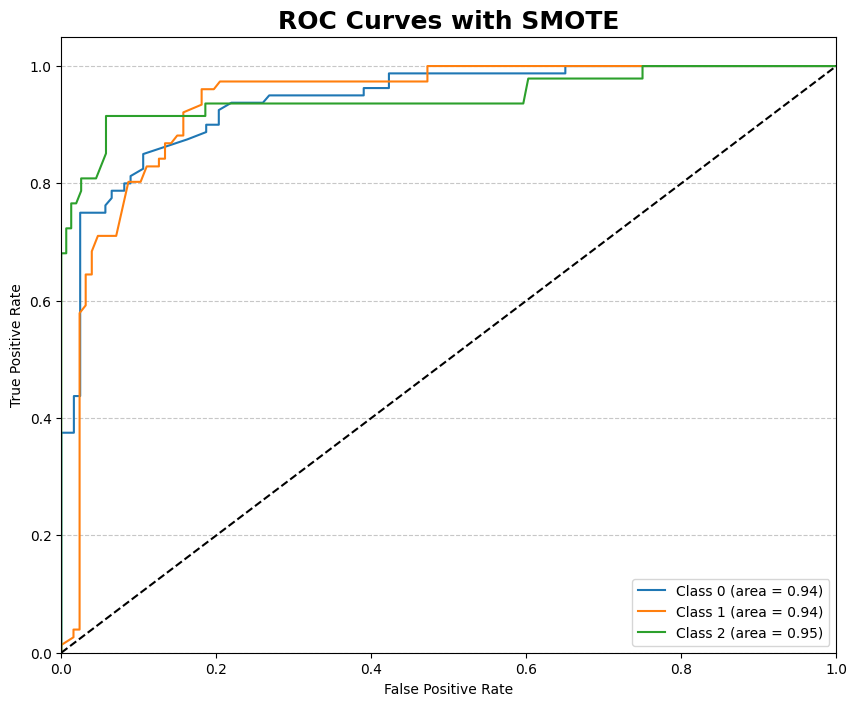

In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves
def plot_roc_curves_with_smote(model, X_test, y_test, title):
    plt.figure(figsize=(10, 8))
    for i in range(3):  # assuming 3 classes
        fpr, tpr, _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# ROC Curve with SMOTE
plot_roc_curves_with_smote(gb_model_smote, X_test, y_test, 'ROC Curves with SMOTE')


The AUC values for all three classes are high (0.94 for Classes 0 and 1, and 0.95 for Class 2). This indicates that the model performs very well in distinguishing between the different classes.
The ROC curves for all classes show that the model has a balanced performance, with similar high AUC values across the classes.
The high performance across all classes suggests that the application of SMOTE has helped in handling class imbalance, ensuring that the model performs well for minority classes as well as the majority class.

#### Precision-Recall Curve

The Precision-Recall (PR) curve is a graphical representation that illustrates the trade-off between precision and recall for different threshold settings of a binary classifier. In this plot, we have PR curves for a multi-class classification problem with three classes (0, 1, and 2).

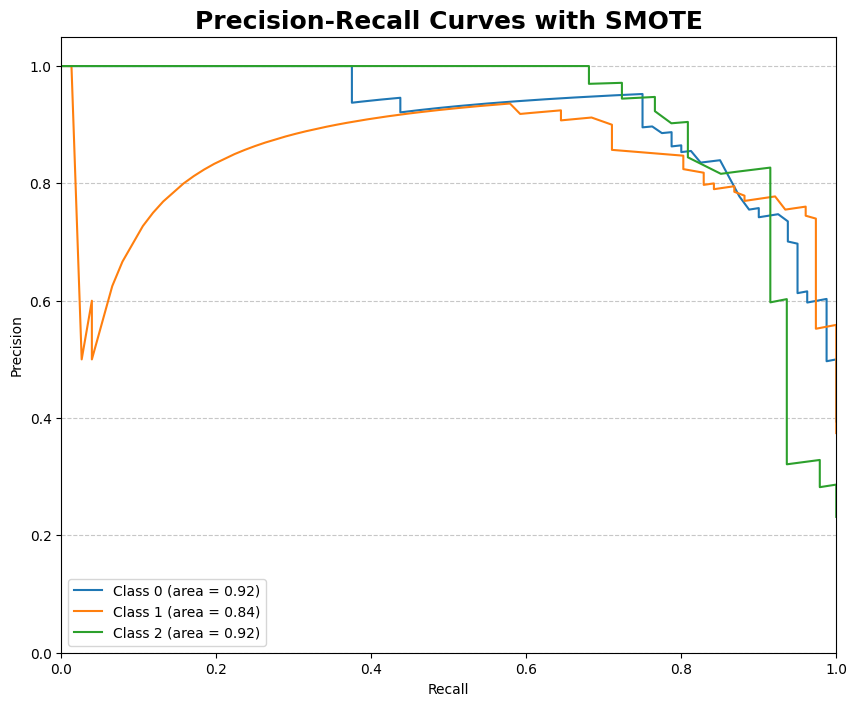

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot Precision-Recall curves
def plot_precision_recall_curves_with_smote(model, X_test, y_test, title):
    plt.figure(figsize=(10, 8))
    for i in range(3):  # assuming 3 classes
        precision, recall, _ = precision_recall_curve(y_test == i, model.predict_proba(X_test)[:, i])
        avg_precision = average_precision_score(y_test == i, model.predict_proba(X_test)[:, i])
        plt.plot(recall, precision, label=f'Class {i} (area = {avg_precision:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(loc="lower left")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Precision-Recall Curve with SMOTE
plot_precision_recall_curves_with_smote(gb_model_smote, X_test, y_test, 'Precision-Recall Curves with SMOTE')


The high AP values of 0.92 for Classes 0 and 2 indicate that the model performs exceptionally well for these classes, with a good balance of precision and recall.
The AP value of 0.84 for Class 1 suggests that the model has a slightly harder time balancing precision and recall for this class, although it still performs reasonably well.
The PR curves indicate that SMOTE has helped to improve the performance of the model for the minority classes, ensuring that they are well-represented and have high precision and recall.

### Model Ensembling

We decided to create an ensemble model using Random Forest, Gradient Boosting, and Logistic Regression to leverage the strengths of each algorithm and achieve more robust and accurate predictions. Random Forest offers stability and reduces overfitting through averaging multiple decision trees, Gradient Boosting captures complex patterns by sequentially correcting errors, and Logistic Regression provides a simple, interpretable linear model. Combining these diverse approaches in a VotingClassifier allows us to capitalize on their complementary strengths, resulting in improved overall performance. Additionally, incorporating SMOTE for class imbalance ensures balanced precision and recall across all risk levels, further enhancing the model's reliability and effectiveness in predicting maternal health risks.

In [ ]:
# Without Bayesian Tuned Parameters
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
 ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4)),
 ('rf', RandomForestClassifier(n_estimators=200, max_depth=4)),
 ('lr', LogisticRegression(max_iter=200))
]

# Initialize and train the ensemble model without SMOTE
ensemble_model_no_smote = VotingClassifier(estimators=base_models, voting='soft')
ensemble_model_no_smote.fit(X_train, y_train)

# Evaluate the ensemble model without SMOTE
y_pred_no_smote = ensemble_model_no_smote.predict(X_test)
print("Without SMOTE - Accuracy:", accuracy_score(y_test, y_pred_no_smote))
print("Without SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no_smote))
print("Without SMOTE - Classification Report:\n", classification_report(y_test, y_pred_no_smote))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the ensemble model with SMOTE
ensemble_model_smote = VotingClassifier(estimators=base_models, voting='soft')
ensemble_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate the ensemble model with SMOTE
y_pred_smote = ensemble_model_smote.predict(X_test)
print("With SMOTE - Accuracy:", accuracy_score(y_test, y_pred_smote))
print("With SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("With SMOTE - Classification Report:\n", classification_report(y_test, y_pred_smote))


Without SMOTE - Accuracy: 0.8177339901477833
Without SMOTE - Confusion Matrix:
 [[68  9  3]
 [15 56  5]
 [ 3  2 42]]
Without SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        80
           1       0.84      0.74      0.78        76
           2       0.84      0.89      0.87        47

    accuracy                           0.82       203
   macro avg       0.82      0.83      0.82       203
weighted avg       0.82      0.82      0.82       203

With SMOTE - Accuracy: 0.8078817733990148
With SMOTE - Confusion Matrix:
 [[66 12  2]
 [13 57  6]
 [ 2  4 41]]
With SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82        80
           1       0.78      0.75      0.77        76
           2       0.84      0.87      0.85        47

    accuracy                           0.81       203
   macro avg       0.81      0.82      0.8

**Performance Comparison**:
- The model without SMOTE has slightly higher overall accuracy.
- SMOTE improves the balance between precision and recall for the Mid Risk class, making the model less biased towards the majority class.
- For the High Risk class, SMOTE leads to a small decrease in precision, recall, and F1-score.

**Recommendation**:
- **Without SMOTE**: If overall accuracy is prioritized and the current imbalance is acceptable.
- **With SMOTE**: If a more balanced performance across classes is desired, especially for ensuring that the minority classes (Mid Risk and High Risk) are adequately represented.

In [ ]:
# With Bayesian Tuned Parameters
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Define base models with tuned parameters for Gradient Boosting
base_models = [
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.11428292554660366, max_depth=9, min_samples_split=3, min_samples_leaf=4, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=4, random_state=42)),
    ('lr', LogisticRegression(max_iter=200, random_state=42))
]

# Initialize and train the ensemble model without SMOTE
ensemble_model_no_smote = VotingClassifier(estimators=base_models, voting='soft')
ensemble_model_no_smote.fit(X_train, y_train)

# Evaluate the ensemble model without SMOTE
y_pred_no_smote = ensemble_model_no_smote.predict(X_test)
print("Without SMOTE - Accuracy:", accuracy_score(y_test, y_pred_no_smote))
print("Without SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no_smote))
print("Without SMOTE - Classification Report:\n", classification_report(y_test, y_pred_no_smote))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the ensemble model with SMOTE
ensemble_model_smote = VotingClassifier(estimators=base_models, voting='soft')
ensemble_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate the ensemble model with SMOTE
y_pred_smote = ensemble_model_smote.predict(X_test)
print("With SMOTE - Accuracy:", accuracy_score(y_test, y_pred_smote))
print("With SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("With SMOTE - Classification Report:\n", classification_report(y_test, y_pred_smote))


Without SMOTE - Accuracy: 0.8472906403940886
Without SMOTE - Confusion Matrix:
 [[68  9  3]
 [10 62  4]
 [ 2  3 42]]
Without SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        80
           1       0.84      0.82      0.83        76
           2       0.86      0.89      0.88        47

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203

With SMOTE - Accuracy: 0.8275862068965517
With SMOTE - Confusion Matrix:
 [[64 12  4]
 [ 9 63  4]
 [ 1  5 41]]
With SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        80
           1       0.79      0.83      0.81        76
           2       0.84      0.87      0.85        47

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.8

### Model Stacking

The StackingClassifier is an ensemble learning method that combines multiple machine learning models to improve the overall performance. The key idea behind stacking is to train multiple base models (also known as level-0 models) and then use their predictions as inputs for a meta-model (level-1 model), which makes the final predictions.

Beispiel:

To enhance the predictive performance and robustness of our maternal health risk classification model, we implemented a stacking ensemble using Decision Tree, Random Forest, and Gradient Boosting as base models, with Logistic Regression as the meta model. This approach allows us to leverage the strengths of each algorithm: Decision Tree provides simple and interpretable splits, Random Forest offers robustness through aggregation of multiple trees, and Gradient Boosting captures complex patterns by sequentially correcting errors. We trained and evaluated the stacking model both with and without the application of SMOTE, a technique to address class imbalance by generating synthetic samples for minority classes.

In [ ]:
# Without Bayesian Tuned Parameters
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42))
]

# Define meta model
meta_model = LogisticRegression(max_iter=200)

# Initialize Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train and evaluate the stacking model without SMOTE
stacking_model.fit(X_train, y_train)
y_pred_no_smote = stacking_model.predict(X_test)
print("Without SMOTE - Accuracy:", accuracy_score(y_test, y_pred_no_smote))
print("Without SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no_smote))
print("Without SMOTE - Classification Report:\n", classification_report(y_test, y_pred_no_smote))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate the stacking model with SMOTE
stacking_model_smote = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = stacking_model_smote.predict(X_test)
print("With SMOTE - Accuracy:", accuracy_score(y_test, y_pred_smote))
print("With SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("With SMOTE - Classification Report:\n", classification_report(y_test, y_pred_smote))


Without SMOTE - Accuracy: 0.812807881773399
Without SMOTE - Confusion Matrix:
 [[63 12  5]
 [11 62  3]
 [ 1  6 40]]
Without SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81        80
           1       0.78      0.82      0.79        76
           2       0.83      0.85      0.84        47

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.81      0.81      0.81       203

With SMOTE - Accuracy: 0.8275862068965517
With SMOTE - Confusion Matrix:
 [[65 11  4]
 [11 62  3]
 [ 1  5 41]]
With SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        80
           1       0.79      0.82      0.81        76
           2       0.85      0.87      0.86        47

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83

In [ ]:
# With Bayesian Tuned Parameters
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define base models with tuned parameters for Gradient Boosting
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.11428292554660366, max_depth=9, min_samples_split=3, min_samples_leaf=4, random_state=42))
]

# Define meta model
meta_model = LogisticRegression(max_iter=200)

# Initialize Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train and evaluate the stacking model without SMOTE
stacking_model.fit(X_train, y_train)
y_pred_no_smote = stacking_model.predict(X_test)
print("Without SMOTE - Accuracy:", accuracy_score(y_test, y_pred_no_smote))
print("Without SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no_smote))
print("Without SMOTE - Classification Report:\n", classification_report(y_test, y_pred_no_smote))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate the stacking model with SMOTE
stacking_model_smote = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = stacking_model_smote.predict(X_test)
print("With SMOTE - Accuracy:", accuracy_score(y_test, y_pred_smote))
print("With SMOTE - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("With SMOTE - Classification Report:\n", classification_report(y_test, y_pred_smote))


Without SMOTE - Accuracy: 0.8226600985221675
Without SMOTE - Confusion Matrix:
 [[63 12  5]
 [ 9 64  3]
 [ 1  6 40]]
Without SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        80
           1       0.78      0.84      0.81        76
           2       0.83      0.85      0.84        47

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.82      0.82       203

With SMOTE - Accuracy: 0.8275862068965517
With SMOTE - Confusion Matrix:
 [[64 12  4]
 [ 9 64  3]
 [ 1  6 40]]
With SMOTE - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        80
           1       0.78      0.84      0.81        76
           2       0.85      0.85      0.85        47

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.8